In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
panda_path = '/Users/michaelhartnett/Projects/GA/DSI/Class Projects/SAT:ACT/project_1/data'
panda_path

'/Users/michaelhartnett/Projects/GA/DSI/Class Projects/SAT:ACT/project_1/data'

In [21]:
sat_2019_by_intended_college_major=pd.read_csv(f'{panda_path}/sat_2019_by_intended_college_major.csv')
sat_act_by_college=pd.read_csv(f'{panda_path}/sat_act_by_college.csv')
sat_2019=pd.read_csv(f'{panda_path}/sat_2019.csv')
act_2019=pd.read_csv(f'{panda_path}/act_2019.csv')

In [22]:
sat_act_2019_merge = pd.merge(sat_2019, act_2019)
sat_act_2019_merge.head()

,State,Participation Rate,EBRW,Math,Total,Participation,Composite
0,Alabama,7%,583,560,1143,100%,18.9
1,Alaska,41%,556,541,1097,38%,20.1
2,Arizona,31%,569,565,1134,73%,19.0
3,Arkansas,6%,582,559,1141,100%,19.3
4,California,63%,534,531,1065,23%,22.6


In [23]:
new_columns_dict = {
    'Participation Rate':'SAT Participation',
    'Total':'Average SAT Total',
    'Participation':'ACT Participation',
    'Composite':'Average ACT Score'}
sat_act_2019_merge.rename(columns=new_columns_dict, inplace=True)

In [24]:
sat_act_2019_merge.head()

,State,SAT Participation,EBRW,Math,Average SAT Total,ACT Participation,Average ACT Score
0,Alabama,7%,583,560,1143,100%,18.9
1,Alaska,41%,556,541,1097,38%,20.1
2,Arizona,31%,569,565,1134,73%,19.0
3,Arkansas,6%,582,559,1141,100%,19.3
4,California,63%,534,531,1065,23%,22.6


In [25]:
national_sat_average=sat_act_2019_merge['Average SAT Total'].mean()
national_act_average=sat_act_2019_merge['Average ACT Score'].mean()
sat_variance=sat_act_2019_merge['Average SAT Total'].var()
act_variance=sat_act_2019_merge['Average ACT Score'].var()
sat_stdev=sat_variance**.5
act_stdev=act_variance**.5

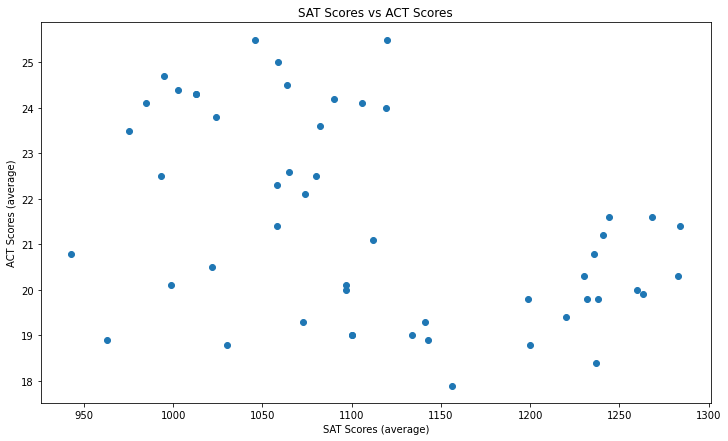

In [26]:
plt.figure(figsize=(12, 7))
# Scatter plot
plt.scatter(sat_act_2019_merge['Average SAT Total'], sat_act_2019_merge['Average ACT Score'])
plt.title('SAT Scores vs ACT Scores')
# Add axis labels
plt.xlabel('SAT Scores (average)')
plt.ylabel('ACT Scores (average)');

In [27]:
#strip code from: https://stackoverflow.com/questions/55278278/how-to-apply-filter-condition-in-percentage-string-column-using-pandas
act_participation_filter = sat_act_2019_merge['ACT Participation'].str.rstrip('%').astype('float')
sat_participation_filter = sat_act_2019_merge['SAT Participation'].str.rstrip('%').astype('float')
sat_act_2019_merge['ACT Participation']=act_participation_filter
sat_act_2019_merge['SAT Participation']=sat_participation_filter
sat_act_2019_merge.head()

,State,SAT Participation,EBRW,Math,Average SAT Total,ACT Participation,Average ACT Score
0,Alabama,7.0,583,560,1143,100.0,18.9
1,Alaska,41.0,556,541,1097,38.0,20.1
2,Arizona,31.0,569,565,1134,73.0,19.0
3,Arkansas,6.0,582,559,1141,100.0,19.3
4,California,63.0,534,531,1065,23.0,22.6


In [28]:
above_50=sat_act_2019_merge[(sat_act_2019_merge['SAT Participation'] > 50) & (sat_act_2019_merge['ACT Participation'] > 50)]

In [29]:
def participation_combos(sat_part , act_part):
    result=sat_act_2019_merge[(sat_act_2019_merge['SAT Participation'] > sat_part) & (sat_act_2019_merge['ACT Participation'] > act_part)]
    return result

In [30]:
participation_combos(50 , 50)

,State,SAT Participation,EBRW,Math,Average SAT Total,ACT Participation,Average ACT Score
9,Florida,100.0,516,483,999,54.0,20.1
11,Hawaii,54.0,550,550,1100,80.0,19.0
33,North Carolina,51.0,554,546,1100,100.0,19.0
40,South Carolina,68.0,526,504,1030,78.0,18.8


In [31]:
sat_act_by_college.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [32]:
percentile_filter=sat_act_by_college['SAT Total 25th-75th Percentile']
sat_act_by_college['SAT Total 25th-75th Percentile']=percentile_filter.replace("\u200b\u200b 1530-1560", "1530-1560")
sat_act_by_college['SAT Total 25th-75th Percentile']=percentile_filter.replace("\u200b\u200b 1500-1570", "1500-1570")
sat_act_by_college['SAT Total 25th-75th Percentile']=percentile_filter.replace("\u200b\u200b 1440-1570", "1440-1570")
sat_act_by_college['SAT Total 25th-75th Percentile']=percentile_filter.replace("\u200b\u200b 1490-1570", "1490-1570")
sat_act_by_college['SAT Total 25th-75th Percentile']=percentile_filter.replace("--", "400-1600")
percentile_filter[254]


'400-1600'

In [33]:
j=percentile_filter.str.split('-')
j

0      [1440, 1570]
1      [1460, 1580]
2      [1440, 1570]
3      [1450, 1560]
4      [1460, 1570]
           ...     
411     [950, 1130]
412     [990, 1180]
413    [1050, 1270]
414    [1060, 1280]
415     [820, 1050]
Name: SAT Total 25th-75th Percentile, Length: 416, dtype: object

In [34]:
for i in range(len(j)):
    j[i]=list(map(float,j[i]))

In [35]:
sat_act_by_college['SAT Total 25th-75th Percentile'] = j
sat_act_by_college.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,"[1440.0, 1570.0]",32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,"[1460.0, 1580.0]",33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,"[1440.0, 1570.0]",32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,"[1450.0, 1560.0]",33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,"[1460.0, 1570.0]",33-35


In [36]:
np.array(j.values.tolist())

array([[1440. , 1570. ],
       [1460. , 1580. ],
       [1440. , 1570. ],
       [1450. , 1560. ],
       [1460. , 1570. ],
       [1530. , 1560. ],
       [1500. , 1570. ],
       [1440. , 1570. ],
       [1490. , 1570. ],
       [1390. , 1540. ],
       [1450. , 1560. ],
       [1440. , 1560. ],
       [1330. , 1520. ],
       [1450. , 1570. ],
       [1380. , 1540. ],
       [1440. , 1550. ],
       [1460. , 1560. ],
       [1360. , 1510. ],
       [1470. , 1560. ],
       [1400. , 1560. ],
       [1450. , 1560. ],
       [1410. , 1550. ],
       [1340. , 1520. ],
       [1270. , 1480. ],
       [1290. , 1510. ],
       [1360. , 1520. ],
       [1350. , 1530. ],
       [1410. , 1550. ],
       [1350. , 1510. ],
       [1340. , 1490. ],
       [1300. , 1480. ],
       [1490. , 1570. ],
       [1370. , 1530. ],
       [1300. , 1530. ],
       [1390. , 1540. ],
       [1470. , 1570. ],
       [1360. , 1530. ],
       [1460. , 1560. ],
       [1400. , 1550. ],
       [1283. , 1510. ],


In [37]:
def school_checker_reach(score):
    school_list=[]
    for i in range(len(sat_act_by_college['SAT Total 25th-75th Percentile'])):
        if score >= sat_act_by_college['SAT Total 25th-75th Percentile'][i][0]:
            school_list.append(sat_act_by_college['School'][i])
            school_list.append(sat_act_by_college['SAT Total 25th-75th Percentile'][i][0])
    return school_list

In [39]:
school_checker_reach(830)

['Gustavus Adolphus College',
 400.0,
 'Ball State',
 400.0,
 'Weber State',
 400.0,
 'University of Kansas',
 400.0,
 'Kansas State University',
 400.0,
 'Gallaudet University',
 793.0,
 'Milwaukee School of Engineering',
 400.0,
 'University of Texas El Paso',
 820.0]

In [41]:
def school_checker_safer(score):
    school_list=[]
    for i in range(len(sat_act_by_college['SAT Total 25th-75th Percentile'])):
        if score >= sat_act_by_college['SAT Total 25th-75th Percentile'][i][1]:
            school_list.append(sat_act_by_college['School'][i])
            school_list.append(sat_act_by_college['SAT Total 25th-75th Percentile'][i][1])
    return school_list

In [42]:
school_checker_safer(1600)

['Stanford University',
 1570.0,
 'Harvard College',
 1580.0,
 'Princeton University',
 1570.0,
 'Columbia University',
 1560.0,
 'Yale University',
 1570.0,
 'California Institute of Technology',
 1560.0,
 'Massachusetts Institute of Technology',
 1570.0,
 'Brown University',
 1570.0,
 'University of Chicago',
 1570.0,
 'Pomona College',
 1540.0,
 'University of Pennsylvania',
 1560.0,
 'Dartmouth College',
 1560.0,
 'Bowdoin College',
 1520.0,
 'Duke University',
 1570.0,
 'Swarthmore College',
 1540.0,
 'Northwestern University',
 1550.0,
 'Vanderbilt University',
 1560.0,
 'Claremont McKenna College',
 1510.0,
 'Johns Hopkins University',
 1560.0,
 'Cornell University',
 1560.0,
 'Rice University',
 1560.0,
 'Amherst College',
 1550.0,
 'Barnard College',
 1520.0,
 'Bates College',
 1480.0,
 'University of California—\u200bLos Angeles',
 1510.0,
 'Tulane University',
 1520.0,
 'University of Southern California',
 1530.0,
 'Williams College',
 1550.0,
 'Colby College',
 1510.0,
 'P